<a href="https://colab.research.google.com/github/godsen1/ColabAI/blob/17.02.24/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Used%20Car%20Dataset.csv", index_col="Unnamed: 0")
df.drop(columns=['car_name', 'registration_year', 'ownsership', 'transmission'], inplace=True)

Дані про ціни вживаних автомобілів у Індії
* car_name - назва авто у форматі 'рік компанія основна назва'
* registration_year - місяць та рік реєстрації
* ownsership - кількість власників у форматі 'Second owner'
* transmission - тип коробки передач
* insurance_validity - тип страховки
* fuel_type - вид палива
* seats - кількість сидінь
* kms_driven - пробіг
* manufacturing_year - рік виробництва, має тип object, потрібно застосувати astype(int)
* mileage(kmpl) - скільки кілометрів проїде за літр палива
* engine(cc) - об'єм двигуна у мл
* max_power(bhp) - потужність у кінських силах
* torque(Nm) - крутний момент двигуна
* price(in lakhs) - ціна у сто тисяч рупій

[Повний аналіз даних](https://www.kaggle.com/code/abdelrasoul/used-cars-prices-prediction)

In [47]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


In [48]:
#df = df[['fuel_type', 'kms_driven', 'engine(cc)', 'price(in lakhs)']]
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


# Завдання 1
Очистіть дані від викидів, розділіть на тренувальну та тестову чатини

In [73]:
df['manufacturing_year']

,manufacturing_year
0,2017
1,2020
2,2018
3,2019
4,2019
...,...
1548,2020
1549,Power Steering
1550,2017
1551,2018


In [76]:
mask= df['manufacturing_year'] != 'Air Conditioner'
df= df[mask]
df['manufacturing_year']= df['manufacturing_year'].astype(int)

<ipython-input-76-2bbdd1a70454>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['manufacturing_year']= df['manufacturing_year'].astype(int)


In [49]:
table_num = df.select_dtypes(include="number").columns

table_num


Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')

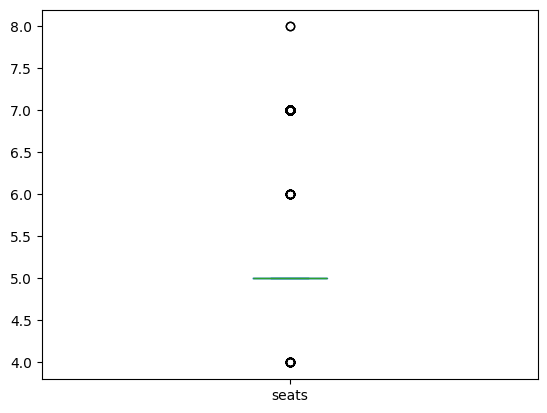

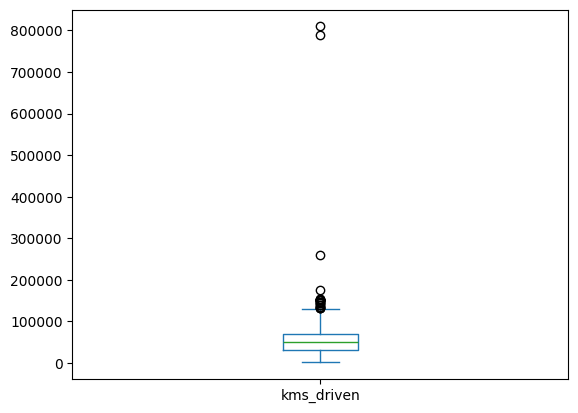

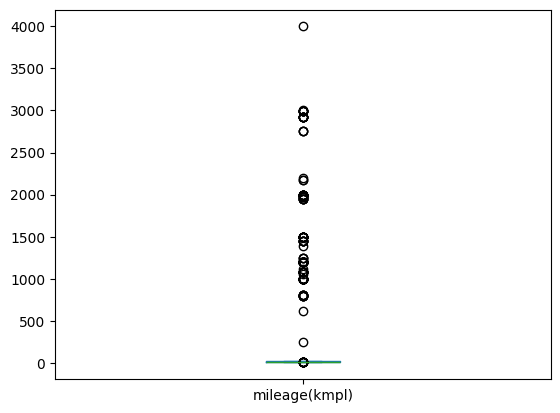

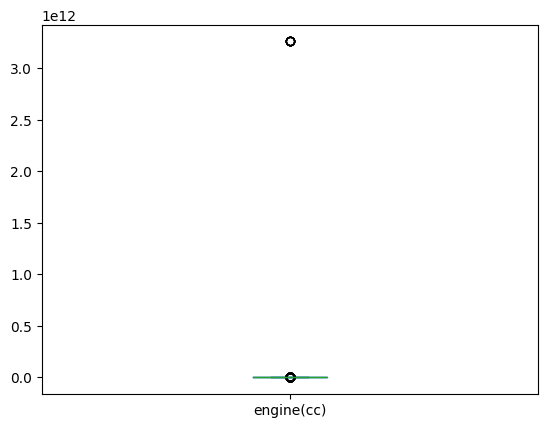

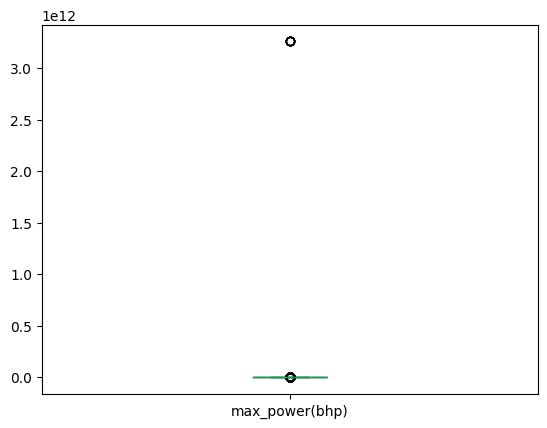

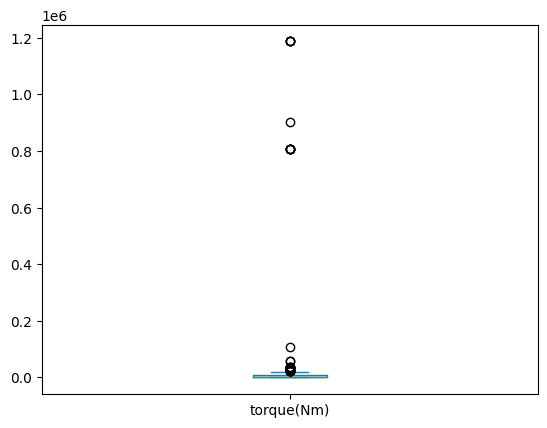

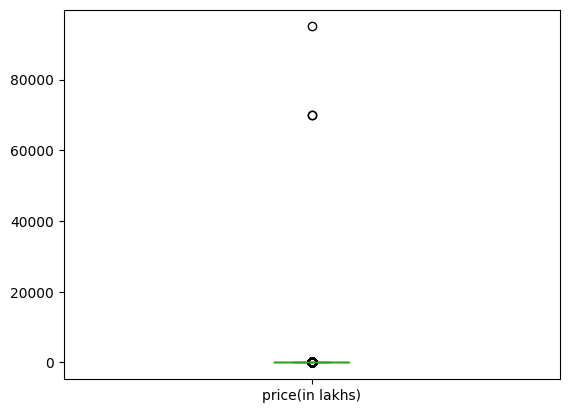

In [77]:
for col in table_num:
  df[col].plot(kind="box")
  plt.show()

In [78]:
mask= df['kms_driven'] <700000
df= df[mask]

mask= df["engine(cc)"] <1*1e6
df= df[mask]

mask= df['price(in lakhs)'] <60000
df= df[mask]



In [79]:
y= df["price(in lakhs)"]
X= df.drop(columns="price(in lakhs)")

X.head(5)


,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42
                                                    )

X_train.shape, X_test.shape

((1188, 9), (298, 9))

# Завдання 2
Створіть Pipeline для обробки даних

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [82]:
num_columns = X_train.select_dtypes(include='number').columns
cat_columns = X_train.select_dtypes(include='object').columns

num_columns

Index(['seats', 'kms_driven', 'manufacturing_year', 'mileage(kmpl)',
       'engine(cc)', 'max_power(bhp)', 'torque(Nm)'],
      dtype='object')

In [83]:
num_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='median'))
])

In [84]:
cat_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [85]:
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_columns),
    ('cat', cat_transformer, cat_columns)
])

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['seats', 'kms_driven', 'manufacturing_year', 'mileage(kmpl)',
       'engine(cc)', 'max_power(bhp)', 'torque(Nm)'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OrdinalEncoder())]),
                                 Index(['insurance_validity', 'fuel_type'], dtype='object'))])

# Завдання 3
Створіть остаточну модель та натренуйте її

In [95]:
from sklearn.tree import DecisionTreeRegressor
full_model= Pipeline([
    ("step", preprocessor),
    ("tree", DecisionTreeRegressor(max_depth=9))
])

In [96]:
full_model.fit(X_train, y_train)

Pipeline(steps=[('step',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['seats', 'kms_driven', 'manufacturing_year', 'mileage(kmpl)',
       'engine(cc)', 'max_power(bhp)', 'torque(Nm)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  Index(['insurance_validity', 'fuel_type'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=9))])

# Завдання 4
Виведіть основні метрики моделі

In [97]:
from sklearn import metrics
pred= full_model.predict(X_test)
metrics.r2_score(y_test, pred)

0.6856103376462617

# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

# Завдання 6
Збережіть модель

In [ ]:
import joblib
joblib.dump(full_model, "model.pkl")

In [ ]:
joblib.load("model.pkl")